## Are Consumer's Basket products indeed the cheapest ones in the market?
## Do supermarket chains promote their own private labels through Consumer's Basket?

## METHODOLOGY

**STEP 1: Read & Inspect the Datasets** 

Read & Inspect the two separate datasets on basket products `kalathi-nikokyriou-26-30_07_2024.csv`and all other market products `df_products_alldata_26-30 July 2024.csv`

**Results of Step 1**

`kalathi-nikokyriou-26-30_07_2024.csv` has 
- 56 different categories 
- 16 merchants

`df_products_alldata_26-30 July 2024.csv` has
- 315 unique categories
- 12 merchants

**STEP 2: Normalize the categories between the two datasets**

Categories are not the same and I will create a mapping dictionary that matches the `df_products_alldata_26-30 July 2024.csv` "sub_sub_category_name" with the `kalathi-nikokyriou-26-30_07_2024.csv` "category_name" column 

**Results of Step 2**
- `kalathi-nikokyriou-26-30_07_2024.csv` Matched Categories: 51 matches
- `df_products_alldata_26-30 July 2024.csv` categories matched: 94 matches
- `Categories were not matched`: Σαμπουάν για Μωρά, Γάλα Φρέσκο (Χαμηλά Λιπαρά <2%), Γιαούρτι από Γάλα Αγελάδος Χωρίς Γεύσεις (Χαμηλά Λιπαρά <2%), Τυρί με Χαμηλά Λιπαρά, Γάλα παστερίωσης με χαμηλά λιπαρά

**STEP 3: Normalize the merchants between the two datasets** 

The basket has 16 merchants in comparison to all products data that have 12 merchants. 
I will not consider the extra 4 merchants in my analysis (mostly e-shops but not only)

**drop eshops from basket that are not contained in df_allproducts**
- kantzas 
- pitsias
- efood
- wolt

**STEP 4: Create a flag for the `inbasket` value** 

This step creates a new column in the two datasets that includes the information of wheather the product in included in the basket or not. This way, when I merge the two datasets I will not loose this information 

**STEP 5: Merge the two dfs**

Now it's time to merge my dfs into a common dataframe with all the products in the market. 

**STEP 6: Create a df with cheapest product per category and flag its presence in the basket**

This step compare the cheapest product per merchant per category inside and outside the basket and then
creates a new dataframe that includes the cheapest product sold by each merchant in each category.

In [4]:
import pandas as pd
pd.set_option('display.max_rows', None)


### STEP 1: Read and Inspect the datasets

#### 1a. Read & Inspect the basket data

In [5]:
df_basket = pd.read_csv("kalathi-nikokyriou-26-30_07_2024.csv")
df_basket.head()

,barcode,name,parent_categ,category_name,category_uuid,price,price_normalized,unit,image,diabetes,merchant_name,merchant_displayname,pl,from,until
0,5201502110050,AGRINO BELLA ΡΥΖΙ ΕΛΛΗΝΙΚΟ 500GR,Τρόφιμα Παντοπωλείου,Ρύζι,1,2.00,4.00,Kg,7283604.jpg,NaN,ab,ΑΒ Βασιλόπουλος,0,2024-07-24,2024-07-30
1,5202336124374,ΑΒ ΡΥΖΙ ΚΑΡΟΛΙΝΑ ΕΛΛΗΝΙΚΟ 1KG,Τρόφιμα Παντοπωλείου,Ρύζι,1,1.79,1.79,Kg,7614627.jpg,NaN,ab,ΑΒ Βασιλόπουλος,1,2024-07-24,2024-07-30
2,5202336109876,ΑΒ ΨΩΜΙ ΤΟΣΤ ΣΙΚΑΛΗΣ 340ΓΡ,Είδη Αρτοζαχαροπλαστείου,Ψωμί για Tοστ,2,0.75,2.21,Kg,7347418.jpg,NaN,ab,ΑΒ Βασιλόπουλος,1,2024-07-24,2024-07-30
3,5204647003683,ΑΡΤΟΠ/ΣΜΑ ΧΩΡΙΑΤΙΚΟ 350ΓΡ ΚΤΨ,Είδη Αρτοζαχαροπλαστείου,Ψωμί Φραντζόλα,3,0.68,1.94,Kg,7619515.jpg,NaN,ab,ΑΒ Βασιλόπουλος,0,2024-07-24,2024-07-30
4,5214000155980,ΑΡΤΟΣ ΤΟΥ ΧΩΡΙΟΥ 350ΓΡ,Είδη Αρτοζαχαροπλαστείου,Ψωμί Φραντζόλα,3,0.99,2.83,Kg,7293943.jpg,NaN,ab,ΑΒ Βασιλόπουλος,0,2024-07-24,2024-07-30


In [3]:
df_basket['category_name'].nunique()

56

In [4]:
df_basket['category_name'].value_counts()

category_name
Πάνες για Μωρά                                                  55
Λαχανικά Κατεψυγμένα                                            45
Πάνες Ακράτειας                                                 43
Γάλα Φρέσκο Πλήρες                                              35
Σερβιέτες ή Ταμπόν                                              34
Λευκή Ζάχαρη                                                    34
Γάλα Φρέσκο (Χαμηλά Λιπαρά <2%)                                 34
Αυγά                                                            30
Γάλα Εβαπορέ                                                    30
Γαλοπούλα                                                       29
Σαμπουάν                                                        29
Ψωμί Φραντζόλα                                                  28
Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες                       28
Αλεύρι                                                          27
Γιαούρτι από Γάλα Αγελάδος Χωρίς Γεύσεις        

In [5]:
df_basket['merchant_name'].value_counts()

merchant_name
masoutis       122
galaxias       111
ab             110
sklavenitis    107
synka           97
kritikos        91
marketin        79
mymarket        78
xalkiadakis     77
pitsias         71
bazaar          69
efood           68
lidl            67
wolt            63
kantzas         62
efresh          58
Name: count, dtype: int64

#### 1b. Read & Inspect other market products data

In [8]:
df_allproducts = pd.read_csv("df_products_alldata_26-30 July 2024.csv")
df_allproducts.head()

,barcode,name,price,price_normalized,parent_category_uuid,parent_category_name,sub_category_uuid,sub_category_name,sub_sub_category_uuid,sub_sub_category_name,merchant_uuid,merchant_name,merchant_displayname,supplier_uuid,supplier_name,image
0,1001,ΠΙΝΔΟΣ ΚΟΤΟΠΟΥΛΟ ΕΛΛΗΝΙΚΟ ΝΩΠΟ(ΤΙΜ. ΚΙΛ),3.75,3.75,410,Φρέσκο Κρέας,414,Φρέσκα Πουλερικά,417,Κοτόπουλο ολόκληρο,1.0,masoutis,Μασούτης,486.0,ΠΙΝΔΟΣ,masoutis.png
1,1001,ΠΙΝΔΟΣ ΚΟΤΟΠΟΥΛΟ ΕΛΛΗΝΙΚΟ ΝΩΠΟ(ΤΙΜ. ΚΙΛ),3.09,3.09,410,Φρέσκο Κρέας,414,Φρέσκα Πουλερικά,417,Κοτόπουλο ολόκληρο,4.0,mymarket,My Market,486.0,ΠΙΝΔΟΣ,mymarket.png
2,1001,ΠΙΝΔΟΣ ΚΟΤΟΠΟΥΛΟ ΕΛΛΗΝΙΚΟ ΝΩΠΟ(ΤΙΜ. ΚΙΛ),2.98,2.98,410,Φρέσκο Κρέας,414,Φρέσκα Πουλερικά,417,Κοτόπουλο ολόκληρο,7.0,synka,Synka,486.0,ΠΙΝΔΟΣ,synka.png
3,1001,ΠΙΝΔΟΣ ΚΟΤΟΠΟΥΛΟ ΕΛΛΗΝΙΚΟ ΝΩΠΟ(ΤΙΜ. ΚΙΛ),2.98,2.98,410,Φρέσκο Κρέας,414,Φρέσκα Πουλερικά,417,Κοτόπουλο ολόκληρο,8.0,xalkiadakis,Xalkiadakis,486.0,ΠΙΝΔΟΣ,xalkiadakis.png
4,1001,ΠΙΝΔΟΣ ΚΟΤΟΠΟΥΛΟ ΕΛΛΗΝΙΚΟ ΝΩΠΟ(ΤΙΜ. ΚΙΛ),3.00,3.00,410,Φρέσκο Κρέας,414,Φρέσκα Πουλερικά,417,Κοτόπουλο ολόκληρο,9.0,sklavenitis,Σκλαβενίτης,486.0,ΠΙΝΔΟΣ,sklavenitis.png


In [12]:
df_allproducts['sub_sub_category_name'].nunique()

315

In [10]:
df_allproducts['sub_sub_category_name'].value_counts()

sub_sub_category_name
Πίτες & Πιτάκια κατεψυγμένα                                   559
Cola                                                          462
Σοκολάτες Γάλακτος & Λευκές                                   462
Μακαρόνια                                                     450
Απορρυπαντικά ρούχων υγρά                                     448
Σαμπουάν                                                      391
Βρεφικές & Παιδικές πάνες                                     358
Σερβιέτες                                                     349
Γιαούρτια Αγελάδος στραγγιστά                                 337
Καφέδες Espresso                                              324
Πατατάκια                                                     291
Καφέδες Στιγμής                                               282
Μαλακτικά ρούχων & Ενισχυτικά αρώματος                        280
Γάλατα Αγελάδος υψηλής παστερίωσης                            274
Λαχανικά κατεψυγμένα                                  

In [11]:
df_allproducts['merchant_name'].value_counts()

merchant_name
mymarket       2626
kritikos       2542
ab             2518
masoutis       2449
sklavenitis    2343
galaxias       2241
synka          2050
efresh         2012
xalkiadakis    1964
marketin       1170
lidl            595
bazaar          348
Name: count, dtype: int64

### STEP 2: Normalize the categories between the two datasets

In [6]:
mapping_dict = {
    'Καρολίνα & Γλασέ': 'Ρύζι',
    'Arborio & άλλα ρύζια': 'Ρύζι',
    'Basmati & Jasmine': 'Ρύζι',
    'Ψωμί για τοστ σίτου': 'Ψωμί για Tοστ',
    'Ψωμί για τοστ πολύσπορο': 'Ψωμί για Tοστ',
    'Ψωμί για τοστ σίκαλης & ολικής': 'Ψωμί για Tοστ',
    'Ψωμί για σάντουιτς': 'Ψωμί Φραντζόλα',
    'Μπαγκέτα': 'Ψωμί Φραντζόλα',
    'Μαργαρίτα & άλλα Ψωμιά για σάντουιτς': 'Ψωμί Φραντζόλα',
    'Φρυγανιές & Κρουτόν': 'Φρυγανιές',
    'Μακαρόνια': 'Μακαρόνια Νο 6',
    'Μπριζόλες χοιρινές': 'Νωπό Χοιρινό',
    'Σπάλα χοιρινή': 'Νωπό Χοιρινό',
    'Κοτόπουλο ολόκληρο': 'Νωπό Κοτόπουλο Ολόκληρο',
    'Κοτόπουλο Στήθος': 'Νωπό Κοτόπουλο Ολόκληρο',
    'Κοτόπουλο Μπούτι & Φτερούγα': 'Νωπό Κοτόπουλο Ολόκληρο',
    'Αλλαντικά Γαλοπούλας': 'Γαλοπούλα',
    'Ψάρια κατεψυγμένα': 'Ψάρια Κατεψυγμένα',
    'Οστρακοειδή κατεψυγμένα': 'Ψάρια Κατεψυγμένα',
    'Χταπόδια, Καλαμάρια & Σουπιές κατεψυγμένα': 'Ψάρια Κατεψυγμένα',
    'Γάλατα Αγελάδος φρέσκα': 'Γάλα Φρέσκο Πλήρες',
    'Γάλατα Αγελάδος υψηλής παστερίωσης': 'Γάλα υψηλής παστερίωσης πλήρες',
    'Γάλατα Ζαχαρούχα': 'Γάλα Εβαπορέ',
    'Γάλατα Συμπυκνωμένα': 'Γάλα Εβαπορέ',
    'Γιαούρτια Αγελάδος στραγγιστά': 'Γιαούρτι από Γάλα Αγελάδος Χωρίς Γεύσεις',
    'Γιαούρτια Αγελάδος': 'Γιαούρτι από Γάλα Αγελάδος Χωρίς Γεύσεις',
    'Φέτα': 'Τυρί Φέτα',
    'Γκούντα': 'Τυρί Γκούντα',
    'Ντομάτα πασσάτα': 'Χυμός Τομάτας Διατηρημένος',
    'Ντοματοπελτές': 'Χυμός Τομάτας Διατηρημένος',
    'Ντομάτα αποφλοιωμένη': 'Χυμός Τομάτας Διατηρημένος',
    'Ντομάτα ψιλοκομμένη': 'Χυμός Τομάτας Διατηρημένος',
    'Ντομάτα στον τρίφτη': 'Χυμός Τομάτας Διατηρημένος',
    'Αυγά': 'Αυγά',
    'Μαργαρίνες': 'Μαργαρίνες',
    'Ελαιόλαδα': 'Παρθένο Ελαιόλαδο',
    'Σπορέλαια': 'Ηλιέλαιο',
    'Λαχανικά κατεψυγμένα': 'Λαχανικά Κατεψυγμένα',
    'Κατεψυγμένα γεύματα με Λαχανικά & άλλα κατεψυγμένα γεύματα': 'Λαχανικά Κατεψυγμένα',
    'Λαδερά': 'Λαχανικά Κατεψυγμένα',
    'Ζάχαρη Λευκή': 'Λευκή Ζάχαρη',
    'Παιδικές κρέμες Μπισκότο': 'Κρέμες για βρέφη',
    'Γάλατα σκόνη 1ης Βρεφικής ηλικίας': 'Γάλα για βρέφη',
    'Γάλατα σκόνη 2ης Βρεφικής ηλικίας': 'Γάλα για βρέφη',
    'Γάλατα σκόνη 3ης Βρεφικής ηλικίας': 'Γάλα για βρέφη',
    'Καφέδες Ελληνικοί': 'Ελληνικός Καφές',
    'Καφέδες Στιγμής': 'Στιγμιαίος Καφές',
    'Καφέδες Φίλτρου': 'Γαλλικός Καφές',
    'Υποκατάστατα ζάχαρης': 'Γλυκαντικές Ουσίες Κατάλληλες για Διαβητικούς',
    'Φακές': 'Φακές',
    'Χυμοί Πορτοκάλι & άλλα Εσπεριδοειδή': 'Χυμός Πορτοκάλι',
    'Χυμοί ψυγείου Πορτοκάλι & άλλα Εσπεριδοειδή': 'Χυμός Πορτοκάλι',
    'Απορρυπαντικά ρούχων υγρά': 'Απορρυπαντικά Πλυντηρίου',
    'Απορρυπαντικά ρούχων σε κάψουλες': 'Απορρυπαντικά Πλυντηρίου',
    'Απορρυπαντικά ρούχων σε σκόνη': 'Απορρυπαντικά Πλυντηρίου',
    'Απορρυπαντικά παιδικών ρούχων': 'Απορρυπαντικά Πλυντηρίου',
    'Χλωρίνες & Χλωροκαθαριστικά': 'Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες',
    'Καθαριστικά πατώματος': 'Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες',
    'Απορρυπαντικά πιάτων για πλύσιμο στο χέρι': 'Απορρυπαντικά Πιάτων',
    'Απορρυπαντικά πιάτων πλυντηρίου': 'Απορρυπαντικά Πιάτων',
    'Ρολά κουζίνας': 'Χαρτί Κουζίνας',
    'Οδοντόκρεμες & Γυαλιστικά δοντιών': 'Οδοντόκρεμα',
    'Ρολά υγείας': 'Χαρτί Υγείας',
    'Σερβιέτες': 'Σερβιέτες ή Ταμπόν',
    'Ταμπόν': 'Σερβιέτες ή Ταμπόν',
    'Σερβιετάκια': 'Σερβιέτες ή Ταμπόν',
    'Δημητριακά Βρόμης & Muesli': 'Προϊόντα Βρώμης',
    'Σαμπουάν': 'Σαμπουάν',
    'Σαπούνια & Υγροσάπουνα': 'Σαπούνι Στερεό',
    'Πάνες & Σερβιέτες ακράτειας, Χαρτοβάμβακας': 'Πάνες Ακράτειας',
    'Βρεφικές & Παιδικές πάνες': 'Πάνες για Μωρά',
    'Μωρομάντιλα': 'Μωρομάντιλα',
    'Υγρή τροφή Σκύλου': 'Τροφή για Σκύλους',
    'Σνακ Σκύλου': 'Τροφή για Σκύλους',
    'Υγρή τροφή Γάτας': 'Τροφή για γάτες',
    'Ξηρά τροφή Γάτας': 'Τροφή για γάτες',
    'Σνακ Γάτας': 'Τροφή για γάτες',
    'Αλεύρι': 'Αλεύρι',
    'Σπάλα, Χτένι & Ελιά μοσχαρίσια': 'Μοσχάρι',
    'Φιλέτο μοσχαρίσιο': 'Μοσχάρι',
    'Πάριζα': 'Πάριζα',
    'Λευκά τυριά Αγελαδινά': 'Λευκό τυρί',
    'Φασόλια': 'Φασόλια',
    'Ρεβίθια, Φάβα & άλλα Όσπρια': 'Ρεβύθια',
}

In [9]:
# Create new column in df_allproducts with this mapping
df_allproducts['category_name'] = df_allproducts['sub_sub_category_name'].map(mapping_dict)
df_allproducts.head()

,barcode,name,price,price_normalized,parent_category_uuid,parent_category_name,sub_category_uuid,sub_category_name,sub_sub_category_uuid,sub_sub_category_name,merchant_uuid,merchant_name,merchant_displayname,supplier_uuid,supplier_name,image,category_name
0,1001,ΠΙΝΔΟΣ ΚΟΤΟΠΟΥΛΟ ΕΛΛΗΝΙΚΟ ΝΩΠΟ(ΤΙΜ. ΚΙΛ),3.75,3.75,410,Φρέσκο Κρέας,414,Φρέσκα Πουλερικά,417,Κοτόπουλο ολόκληρο,1.0,masoutis,Μασούτης,486.0,ΠΙΝΔΟΣ,masoutis.png,Νωπό Κοτόπουλο Ολόκληρο
1,1001,ΠΙΝΔΟΣ ΚΟΤΟΠΟΥΛΟ ΕΛΛΗΝΙΚΟ ΝΩΠΟ(ΤΙΜ. ΚΙΛ),3.09,3.09,410,Φρέσκο Κρέας,414,Φρέσκα Πουλερικά,417,Κοτόπουλο ολόκληρο,4.0,mymarket,My Market,486.0,ΠΙΝΔΟΣ,mymarket.png,Νωπό Κοτόπουλο Ολόκληρο
2,1001,ΠΙΝΔΟΣ ΚΟΤΟΠΟΥΛΟ ΕΛΛΗΝΙΚΟ ΝΩΠΟ(ΤΙΜ. ΚΙΛ),2.98,2.98,410,Φρέσκο Κρέας,414,Φρέσκα Πουλερικά,417,Κοτόπουλο ολόκληρο,7.0,synka,Synka,486.0,ΠΙΝΔΟΣ,synka.png,Νωπό Κοτόπουλο Ολόκληρο
3,1001,ΠΙΝΔΟΣ ΚΟΤΟΠΟΥΛΟ ΕΛΛΗΝΙΚΟ ΝΩΠΟ(ΤΙΜ. ΚΙΛ),2.98,2.98,410,Φρέσκο Κρέας,414,Φρέσκα Πουλερικά,417,Κοτόπουλο ολόκληρο,8.0,xalkiadakis,Xalkiadakis,486.0,ΠΙΝΔΟΣ,xalkiadakis.png,Νωπό Κοτόπουλο Ολόκληρο
4,1001,ΠΙΝΔΟΣ ΚΟΤΟΠΟΥΛΟ ΕΛΛΗΝΙΚΟ ΝΩΠΟ(ΤΙΜ. ΚΙΛ),3.00,3.00,410,Φρέσκο Κρέας,414,Φρέσκα Πουλερικά,417,Κοτόπουλο ολόκληρο,9.0,sklavenitis,Σκλαβενίτης,486.0,ΠΙΝΔΟΣ,sklavenitis.png,Νωπό Κοτόπουλο Ολόκληρο


In [10]:
# Filter only the products with matching categories
df_filtered = df_allproducts.dropna(subset=['category_name'])

In [84]:
# Check if the categories are 51
df_filtered['category_name'].nunique()

51

In [85]:
# Check the categories' names 
df_filtered['category_name'].value_counts()

category_name
Απορρυπαντικά Πλυντηρίου                         667
Γιαούρτι από Γάλα Αγελάδος Χωρίς Γεύσεις         494
Μακαρόνια Νο 6                                   450
Λαχανικά Κατεψυγμένα                             424
Σερβιέτες ή Ταμπόν                               414
Σαμπουάν                                         391
Πάνες για Μωρά                                   358
Απορρυπαντικά Πιάτων                             293
Ψωμί για Tοστ                                    285
Στιγμιαίος Καφές                                 282
Γάλα υψηλής παστερίωσης πλήρες                   274
Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες        261
Τροφή για γάτες                                  258
Μαργαρίνες                                       243
Οδοντόκρεμα                                      222
Πάνες Ακράτειας                                  217
Ελληνικός Καφές                                  193
Γάλα Εβαπορέ                                     192
Χυμός Τομάτας Διατηρημένος      

### STEP 3: Normalize the merchants between the two datasets
**drop eshops from basket that are not contained in df_allproducts**
- kantzas 
- pitsias
- efood
- wolt

In [11]:
merchants_to_exclude = ['kantzas', 'pitsias', 'efood', 'wolt']

df_basket_filtered = df_basket[~df_basket['merchant_name'].isin(merchants_to_exclude)]

In [24]:
# Check the result 
df_basket_filtered.groupby('merchant_name')['category_name'].nunique()

merchant_name
ab             56
bazaar         54
efresh         56
galaxias       56
kritikos       56
lidl           55
marketin       56
masoutis       56
mymarket       56
sklavenitis    56
synka          56
xalkiadakis    56
Name: category_name, dtype: int64

### STEP 4: Create a flag for the `inbasket` value

In [12]:
# In the first dataset
df_filtered['inbasket'] = 'NO'

C:\Users\Dafni\AppData\Local\Temp\ipykernel_22904\2281431599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['inbasket'] = 'NO'


In [13]:
# In the second dataset
df_basket_filtered['inbasket'] = 'YES'

C:\Users\Dafni\AppData\Local\Temp\ipykernel_22904\1907268249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basket_filtered['inbasket'] = 'YES'


### STEP 5: Merge the two dfs

In [88]:
df_basket_filtered.columns

Index(['barcode', 'name', 'parent_categ', 'category_name', 'category_uuid',
       'price', 'price_normalized', 'unit', 'image', 'diabetes',
       'merchant_name', 'merchant_displayname', 'pl', 'from', 'until',
       'inbasket'],
      dtype='object')

In [90]:
df_filtered.columns

Index(['barcode', 'name', 'price', 'price_normalized', 'parent_category_uuid',
       'parent_category_name', 'sub_category_uuid', 'sub_category_name',
       'sub_sub_category_uuid', 'sub_sub_category_name', 'merchant_uuid',
       'merchant_name', 'merchant_displayname', 'supplier_uuid',
       'supplier_name', 'image', 'matching_categories', 'category_name',
       'inbasket'],
      dtype='object')

In [14]:
# Select the desired columns from both dataframes
df_filtered_selected = df_filtered[['barcode', 'name', 'price_normalized', 'merchant_name','category_name', 'supplier_name', 'inbasket']]
df_basket_filtered_selected = df_basket_filtered[['barcode', 'name', 'price_normalized', 'merchant_name', 'pl','category_name', 'inbasket']]

In [15]:
# Merge the two dataframes on common columns
df_combined = pd.merge(df_filtered_selected, df_basket_filtered_selected, on=['barcode','name', 'price_normalized', 'merchant_name', 'inbasket', 'category_name'], how='outer')
df_combined.head(20)

,barcode,name,price_normalized,merchant_name,category_name,supplier_name,inbasket,pl
0,0,ΑΡΤ/ΜΑ ΠΑΡΑΔΟΣΙΑΚΟ ΛΕΥΚΟ ΨΗΜ/ΚΤΨ 350G.,2.14,sklavenitis,Ψωμί Φραντζόλα,NaN,YES,0
1,0,ΓΚΟΥΝΤΑ ΑΥΣΤΡΙΑΣ ALPILAND LIGHT ΦΡΑΤΖΟΛΑ,7.90,sklavenitis,Τυρί με Χαμηλά Λιπαρά,NaN,YES,0
2,0,ΓΚΟΥΝΤΑ ΓΕΡΜΑΝΙΑΣ ΦΡΑΤΖΟΛΑ,6.40,sklavenitis,Τυρί Γκούντα,NaN,YES,0
3,0,ΓΚΟΥΝΤΑ ΟΛΛΑΝΔΙΑΣ ΦΡΑΤΖΟΛΑ,6.40,sklavenitis,Τυρί Γκούντα,NaN,YES,0
4,0,ΕΛΙΑ ΝΕΑΡ.ΜΟΣΧ Α/Ο ΝΩΠΗ Μ.Η.ΟΛΛ Ε/Ζ,11.40,sklavenitis,Μοσχάρι,NaN,YES,1
5,0,ΕΛΙΑ ΝΕΑΡ.ΜΟΣΧ.ΟΛΛ Α/Ο ΝΩΠΗ,11.40,sklavenitis,Μοσχάρι,NaN,YES,0
6,0,ΚΑΠΝΙΣΤΗ ΓΑΛΟΠΟΥΛΑ ΕΔΕΣΜΑ,7.95,sklavenitis,Γαλοπούλα,NaN,YES,0
7,0,ΚΙΜΑΣ ΣΠΑΛΑΣ ΝΕΑΡ.ΜΟΣΧΟΥ ΝΩΠΟΣ ΟΛΛ 500G,11.40,sklavenitis,Μοσχάρι,NaN,YES,0
8,0,ΚΟΤΟΠΟΥΛΑ ΝΩΠΑ Τ65% ΑΓΡΟΖΩΗ ΕΛΛ Ε/Ζ,3.00,sklavenitis,Νωπό Κοτόπουλο Ολόκληρο,NaN,YES,0
9,0,ΚΟΤΟΠΟΥΛΟ ΟΛΟΚΛΗΡΟ ΝΩΠΟ ΕΛΛΗΝΙΚΟ.,3.00,sklavenitis,Νωπό Κοτόπουλο Ολόκληρο,NaN,YES,0


In [96]:
df_combined['inbasket'].value_counts()

inbasket
NO     8944
YES    1066
Name: count, dtype: int64

In [97]:
df_combined['merchant_name'].value_counts()

merchant_name
ab             1116
mymarket       1114
kritikos       1105
masoutis       1102
sklavenitis     998
galaxias        978
synka           883
efresh          842
xalkiadakis     800
marketin        539
lidl            326
bazaar          207
Name: count, dtype: int64

In [98]:
df_combined['pl'].value_counts()

pl
0             715
1             350
279374.jpg      1
Name: count, dtype: int64

In [99]:
df_combined['supplier_name'].value_counts().sum()

8941

In [101]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   barcode           10010 non-null  object 
 1   name              10010 non-null  object 
 2   price_normalized  10010 non-null  float64
 3   merchant_name     10010 non-null  object 
 4   category_name     10010 non-null  object 
 5   supplier_name     8941 non-null   object 
 6   inbasket          10010 non-null  object 
 7   pl                1066 non-null   object 
dtypes: float64(1), object(7)
memory usage: 625.8+ KB


### STEP 6: Create a df with cheapest product per category and flag its presence in the basket
This analysis creates a df with each category's-merchant's minimun price inside and outside the basket and then drops the highest between them

In [16]:
# Find the index of the cheapest product per category and merchant
idx = df_combined.groupby(['category_name', 'merchant_name'])['price_normalized'].idxmin()

# Filter the dataframe to keep only the cheapest products
df_cheapest = df_combined.loc[idx]

# Reset the index
df_cheapest.reset_index(drop=True, inplace=True)

df_cheapest

,barcode,name,price_normalized,merchant_name,category_name,supplier_name,inbasket,pl
0,5201002005566,ΓΙΩΤΗΣ ΑΛΕΥΡΙ Γ. Ο. Χ. 1KG 4/(2+1).,1.070,ab,Αλεύρι,ΓΙΩΤΗΣ,NO,NaN
1,5208086441402,ΑΓΡΟΚΤΗΜΑ 1KG ΑΛΕΥΡΙ ΓΙΑ ΟΛΕΣ ΤΙΣ ΧΡΗΣΕΙΣ Τ70%,0.690,bazaar,Αλεύρι,NaN,YES,1
2,5201544100309,ΜΥΛΟΙ ΑΓ. ΓΕΩΡΓΙΟΥ ΑΛΕΥΡΙ ΓΟΧ. 1KG 4/(2+1),1.390,efresh,Αλεύρι,ΜΥΛΟΙ ΑΓ. ΓΕΩΡΓΙΟΥ,NO,NaN
3,2106101,ΓΙΩΤΗΣ 2+1ΔΩΡΟ ΑΛΕΥΡΙ Γ.Ο.Χ. 1KG.,0.980,galaxias,Αλεύρι,NaN,YES,0
4,707652,ΑΠΟ ΚΑΛΗ ΣΟΔΕΙΑ ΑΛΕΥΡΙ ΓΟΧ 1Κ,0.700,kritikos,Αλεύρι,NaN,YES,0
5,4056489602392,Χρυσός Μύλος Αλεύρι γ. όλες τις χρήσεις τύπου ...,0.690,lidl,Αλεύρι,NaN,YES,1
6,89016870,ECONOMY ΑΛΕΥΡΙ ΓΙΑ ΟΛΕΣ ΤΙΣ ΧΡΗΣΕΙΣ 1Κ,0.690,marketin,Αλεύρι,NaN,YES,1
7,1794999,ΑΛΕΥΡΙ MR GRAND ΓΙΑ ΟΛΕΣ ΤΙΣ ΧΡΗΣΕΙΣ 1Κ,0.700,masoutis,Αλεύρι,NaN,YES,1
8,236461,ΟΡΕΙΝΟΙ ΜΥΛΟΙ ΑΛΕΥΡΙ ΓΙΑ ΟΛΕΣ ΤΙΣ ΧΡΗΣΕΙΣ 1KG ...,0.700,mymarket,Αλεύρι,NaN,YES,0
9,5202576682573,ΑΛΕΥΡΙ ΓΕΝΙΚΗΣ ΧΡΗΣΗΣ ΜΑΡΑΤΑ 1KG,0.700,sklavenitis,Αλεύρι,NaN,YES,1


In [19]:
# Check that each merchant has the same amount of categories as in the original df_basket
df_cheapest.groupby("merchant_name")['category_name'].nunique()

merchant_name
ab             57
bazaar         55
efresh         57
galaxias       57
kritikos       57
lidl           56
marketin       57
masoutis       57
mymarket       57
sklavenitis    57
synka          57
xalkiadakis    57
Name: category_name, dtype: int64

#### Previous method - did not work

In [65]:
# # Concatenate the standardized DataFrames
# combined_df = pd.concat([df_basket_filtered_standardized, df_filtered_standardized])
# combined_df.head(20)

,barcode,name,price_normalized,inbasket,merchant_name,category,pl,supplier_name
0,5201502110050,AGRINO BELLA ΡΥΖΙ ΕΛΛΗΝΙΚΟ 500GR,4.00,YES,ab,Ρύζι,0,NaN
1,5202336124374,ΑΒ ΡΥΖΙ ΚΑΡΟΛΙΝΑ ΕΛΛΗΝΙΚΟ 1KG,1.79,YES,ab,Ρύζι,1,NaN
2,5202336109876,ΑΒ ΨΩΜΙ ΤΟΣΤ ΣΙΚΑΛΗΣ 340ΓΡ,2.21,YES,ab,Ψωμί για Tοστ,1,NaN
3,5204647003683,ΑΡΤΟΠ/ΣΜΑ ΧΩΡΙΑΤΙΚΟ 350ΓΡ ΚΤΨ,1.94,YES,ab,Ψωμί Φραντζόλα,0,NaN
4,5214000155980,ΑΡΤΟΣ ΤΟΥ ΧΩΡΙΟΥ 350ΓΡ,2.83,YES,ab,Ψωμί Φραντζόλα,0,NaN
5,5202336010820,ΑΒ ΦΡΥΓΑΝΙΑ ΣΙΤΟΥ 4/PACK 500GR,2.76,YES,ab,Φρυγανιές,1,NaN
6,5201013012508,ΜΑΚΒΕΛ ΣΠΑΓΓΕΤΙ N6 500GR,1.34,YES,ab,Μακαρόνια Νο 6,0,NaN
7,27362358,2 ΣΠΑΛΑ ΧΟΙΡ. Α/Ο/Δ ΟΛΛ.,5.95,YES,ab,Νωπό Χοιρινό,1,NaN
8,27437551,2 ΜΠΟΥΤΙ ΧΟΙΡ. Α/Ο Α/Δ ΟΛΛ. ENA,5.95,YES,ab,Νωπό Χοιρινό,1,NaN
9,27025864,AB ΚΟΤΟΠΟΥΛΟ ΟΛΟΚΛΗΡΟ,2.99,YES,ab,Νωπό Κοτόπουλο Ολόκληρο,1,NaN


In [64]:
# # Standardize columns in df_basket_filtered
# df_basket_filtered_standardized = df_basket_filtered[['barcode', 'name', 'price_normalized', 'inbasket', 'merchant_name', 'category_name', 'pl']]
# df_basket_filtered_standardized = df_basket_filtered_standardized.rename(columns={'category_name': 'category'})

# # Standardize columns in df_filtered
# df_filtered_standardized = df_filtered[['barcode', 'name', 'price_normalized', 'inbasket', 'merchant_name', 'matching_categories','supplier_name']]
# df_filtered_standardized = df_filtered_standardized.rename(columns={'matching_categories': 'category'})

In [77]:
# # Group by category and merchant, and calculate the minimum price inside and outside the basket
# min_price_df = combined_df.groupby([ 'merchant_name','category','name', 'inbasket'])['price_normalized'].min().reset_index()
# min_price_df.rename(columns={'price_normalized': 'min_price'}, inplace=True)
# min_price_df.head()

,merchant_name,category,name,inbasket,min_price
0,ab,Αλεύρι,1. 2 BAKE ΜΙΓΜΑ ΓΙΑ ΖΥΜΗ ΠΙΤΣΑΣ 10/500G,NO,3.40
1,ab,Αλεύρι,ΑΛΛΑΤΙΝΗ ΑΛ. ΓΙΑ ΤΣΟΥΡΕΚΙ 14/1KG (-0. 30),NO,3.12
2,ab,Αλεύρι,ΑΛΛΑΤΙΝΗ ΑΛΕΥΡΙ ΑΓΙΟΡΕΙΤΙΚΟ 10/1KG,NO,2.79
3,ab,Αλεύρι,ΑΛΛΑΤΙΝΗ ΑΛΕΥΡΙ Γ. Ο. Χ. 14/1KG(-0. 30),NO,1.27
4,ab,Αλεύρι,ΑΛΛΑΤΙΝΗ ΑΛΕΥΡΙ Γ.Ο.Χ. 1ΚG 0.30ΦΘΗΝΟΤΕΡΟ,YES,1.36


In [78]:
min_price_df['inbasket'].value_counts()

inbasket
NO     8870
YES    1061
Name: count, dtype: int64

In [37]:
# Ensure the DataFrame is sorted by price_normalized in ascending order
min_price_df = min_price_df.sort_values(by=['merchant_name', 'category', 'min_price'])

In [58]:
# Drop duplicates, keeping only the first (lowest) price for each group of merchant_name and category
min_price_df = min_price_df.drop_duplicates(subset=['merchant_name', 'category','pl','name'], keep='first')

In [59]:
# Verify the result
min_price_df.head(30)

,merchant_name,category,inbasket,pl,name,min_price
0,ab,Αλεύρι,YES,0,ΑΛΛΑΤΙΝΗ ΑΛΕΥΡΙ Γ.Ο.Χ. 1ΚG 0.30ΦΘΗΝΟΤΕΡΟ,1.36
1,ab,Απορρυπαντικά Πιάτων,YES,0,AVA ACTION ΞΥΔΙ&ΠΡ.ΜΗΛΟ 430ML,2.33
2,ab,Απορρυπαντικά Πλυντηρίου,YES,1,ΑΒ ΣΚΟΝΗ ΠΛΥΝΤ.ACTIVE CLEAN 75MEZ,0.09
3,ab,Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες,YES,1,AB ΧΛΩΡΟΚΑΘΑΡΙΣΤΙΚΟ UL.FRESH 1250ML,0.74
4,ab,Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες,YES,1,AB ΧΛΩΡΟΚΑΘΑΡΙΣΤΙΚΟ UL.LEMON 1250ML,0.74
5,ab,Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες,YES,1,AB ΧΛΩΡΟΚΑΘΑΡΙΣΤΙΚΟ UL.PINK 1250ML,0.74
6,ab,Αυγά,YES,1,AB ΑΥΓΑ 10ΑΔΑ ΑΧΥΡΩΝΑ LARGE 63/73GR,0.33
7,ab,Αυγά,YES,1,AB ΑΥΓΑ 12ΑΔΑ ΜΕDIUM 53/63GR,0.22
8,ab,Γάλα Εβαπορέ,YES,0,NOYNOY LIGHT 400GR,2.53
9,ab,Γάλα Εβαπορέ,YES,0,ΝΟΥΝΟΥ ΕΒΑΠΟΡΕ 400GR,2.53


In [60]:
# Check that each merchant has the same amount of categories as in the original df_basket
min_price_df.groupby("merchant_name")['category'].nunique()

merchant_name
ab             56
bazaar         54
efresh         56
galaxias       56
kritikos       56
lidl           55
marketin       56
masoutis       56
mymarket       56
sklavenitis    56
synka          56
xalkiadakis    56
Name: category, dtype: int64

In [ ]:
# Save the results
min_price_df.to_csv("final_price_comparison_between_basket_and_allproducts_01082024.csv", index=False)

### STEP 7: Analyse the results

#### How many categories per merchant offer the cheapest option inside the basket?

In [114]:
inbasket = df_cheapest.groupby(["merchant_name"])["inbasket"].value_counts().unstack()
inbasket

inbasket,NO,YES
merchant_name,,
ab,17,40
bazaar,4,51
efresh,25,32
galaxias,22,35
kritikos,18,39
lidl,7,49
marketin,12,45
masoutis,13,44
mymarket,17,40


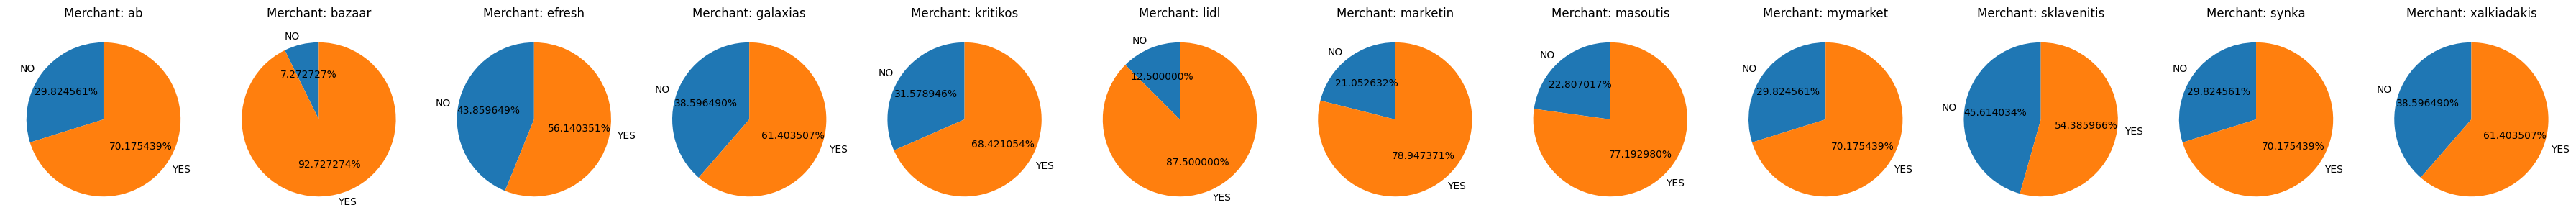

In [121]:
import matplotlib.pyplot as plt

# Plot the data as separate pie charts
num_merchants = len(inbasket)
fig, axes = plt.subplots(1, num_merchants, figsize=(num_merchants * 3, 6))

for i, merchant in enumerate(inbasket.index):
    axes[i].pie(inbasket.loc[merchant], labels=inbasket.columns, autopct='%5f%%', startangle=90)
    axes[i].set_title(f'Merchant: {merchant}')

# Adjust layout
plt.tight_layout()
plt.show()

#### What percentage of the categories per merchant offer the cheapest option inside the basket?

In [111]:
df_cheapest.groupby(["merchant_name"])["inbasket"].value_counts(normalize=True).unstack()

inbasket,NO,YES
merchant_name,,
ab,0.298246,0.701754
bazaar,0.072727,0.927273
efresh,0.438596,0.561404
galaxias,0.385965,0.614035
kritikos,0.315789,0.684211
lidl,0.125000,0.875000
marketin,0.210526,0.789474
masoutis,0.228070,0.771930
mymarket,0.298246,0.701754


#### For each merchant, which product categories are cheapest to buy outside the basket?

In [109]:
cheapest_outside_basket = df_cheapest[df_cheapest['inbasket'] == 'NO']

# Create a dictionary to hold the list of products for each merchant
cheapest_outside_basket_dict = {}

# Group by merchant and create a list of products for each merchant
for merchant, group in cheapest_outside_basket.groupby('merchant_name'):
    product_list = group['category_name'].tolist()
    cheapest_outside_basket_dict[merchant] = product_list

cheapest_outside_basket_dict

{'ab': ['Αλεύρι',
  'Απορρυπαντικά Πιάτων',
  'Αυγά',
  'Γαλλικός Καφές',
  'Γιαούρτι από Γάλα Αγελάδος Χωρίς Γεύσεις',
  'Γλυκαντικές Ουσίες Κατάλληλες για Διαβητικούς',
  'Μαργαρίνες',
  'Μωρομάντιλα',
  'Πάνες Ακράτειας',
  'Πάνες για Μωρά',
  'Σαμπουάν',
  'Σαπούνι Στερεό',
  'Σερβιέτες ή Ταμπόν',
  'Στιγμιαίος Καφές',
  'Τροφή για γάτες',
  'Τυρί Φέτα',
  'Ψωμί για Tοστ'],
 'bazaar': ['Πάνες Ακράτειας',
  'Πάνες για Μωρά',
  'Σερβιέτες ή Ταμπόν',
  'Τροφή για Σκύλους'],
 'efresh': ['Αλεύρι',
  'Απορρυπαντικά Πιάτων',
  'Απορρυπαντικά Πλυντηρίου',
  'Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες',
  'Γάλα Εβαπορέ',
  'Γαλλικός Καφές',
  'Γαλοπούλα',
  'Γιαούρτι από Γάλα Αγελάδος Χωρίς Γεύσεις',
  'Ελληνικός Καφές',
  'Ηλιέλαιο',
  'Λευκό τυρί',
  'Μαργαρίνες',
  'Μωρομάντιλα',
  'Νωπό Κοτόπουλο Ολόκληρο',
  'Οδοντόκρεμα',
  'Πάνες Ακράτειας',
  'Πάνες για Μωρά',
  'Πάριζα',
  'Ρεβύθια',
  'Σερβιέτες ή Ταμπόν',
  'Στιγμιαίος Καφές',
  'Τροφή για Σκύλους',
  'Τροφή για γάτες',
  'Φρυγανι

#### Top 10 cheapest categories outside basket accross all merchants

In [122]:
cheapest_outside_basket['category_name'].value_counts().head(10)

category_name
Πάνες για Μωρά          11
Πάνες Ακράτειας         11
Μωρομάντιλα             11
Στιγμιαίος Καφές        10
Απορρυπαντικά Πιάτων    10
Τυρί Φέτα                9
Σερβιέτες ή Ταμπόν       9
Σαπούνι Στερεό           9
Γαλλικός Καφές           9
Τροφή για γάτες          8
Name: count, dtype: int64

#### what is the percentage of private labels in the cheapest categories that are in the basket for each merchant?

In [126]:

# Filter the dataframe to include only products that are in the basket
in_basket = df_cheapest[df_cheapest['inbasket'] == 'YES']

# Ensure 'pl' column is numerical
in_basket['pl'] = pd.to_numeric(in_basket['pl'], errors='coerce')

# Calculate the percentage of private labels for each merchant and category
pl_percentage = (
    in_basket.groupby(['merchant_name', 'category_name'])['pl']
    .mean() * 100
)

# Reset the index to have a flat DataFrame
pl_percentage_df = pl_percentage.reset_index()
pl_percentage_df.columns = ['Merchant', 'Category', 'PL_Percentage']

# Aggregate these percentages by merchant
pl_percentage_merchant = (
    pl_percentage_df.groupby('Merchant')['PL_Percentage']
    .mean()
    .reset_index()
)

# Display the result
print(pl_percentage_merchant)


       Merchant  PL_Percentage
0            ab      67.500000
1        bazaar      52.941176
2        efresh       0.000000
3      galaxias       8.571429
4      kritikos      23.076923
5          lidl     100.000000
6      marketin      46.666667
7      masoutis      61.363636
8      mymarket      27.500000
9   sklavenitis      45.161290
10        synka      51.282051
11  xalkiadakis      20.000000


C:\Users\Dafni\AppData\Local\Temp\ipykernel_24248\3377586742.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_basket['pl'] = pd.to_numeric(in_basket['pl'], errors='coerce')


In [127]:
# Step 1: Calculate the percentage of categories per merchant that offer the cheapest option inside the basket
# Filter the dataframe to include only products that are in the basket
in_basket = df_cheapest[df_cheapest['inbasket'] == 'YES']

# Calculate the count of categories in the basket per merchant
categories_in_basket = in_basket.groupby('merchant_name')['category_name'].nunique()

# Calculate the total count of categories per merchant
total_categories = df_cheapest.groupby('merchant_name')['category_name'].nunique()

# Calculate the percentage of categories offering the cheapest option inside the basket per merchant
percentage_categories_in_basket = (categories_in_basket / total_categories * 100).reset_index()
percentage_categories_in_basket.columns = ['Merchant', 'Percentage_Categories_In_Basket']

# Step 2: Calculate the percentage of private labels in each category inside the basket for each merchant
# Ensure 'pl' column is numerical
in_basket['pl'] = pd.to_numeric(in_basket['pl'], errors='coerce')

# Calculate the percentage of private labels for each merchant
pl_percentage = (
    in_basket.groupby('merchant_name')['pl']
    .mean() * 100
).reset_index()
pl_percentage.columns = ['Merchant', 'PL_Percentage']

# Step 3: Merge these metrics into a single DataFrame
merged_df = pd.merge(percentage_categories_in_basket, pl_percentage, on='Merchant')

# Step 4: Calculate the correlation between these two metrics
correlation = merged_df['Percentage_Categories_In_Basket'].corr(merged_df['PL_Percentage'])

# Display the result
print(f"Correlation between Percentage of Categories In Basket and PL Percentage: {correlation}")


Correlation between Percentage of Categories In Basket and PL Percentage: 0.6862467725903825


C:\Users\Dafni\AppData\Local\Temp\ipykernel_24248\1195141225.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_basket['pl'] = pd.to_numeric(in_basket['pl'], errors='coerce')



A `correlation coefficient of approximately 0.686` suggests a moderate to strong positive relationship between the two variables:

- percentage of categories per merchant that offer the cheapest option inside the basket.
- Percentage of private labels in each category inside the basket for each merchant.

In practical terms, this means that as the percentage of categories where merchants offer the cheapest option inside the basket increases, the percentage of private labels in the basket also tends to increase. 

This indicates that merchants who are more likely to include the cheapest categories in their basket are also more likely to promote their private labels within those categories.

**Key points to consider:**

- `Positive Relationship:` The positive correlation indicates that there is a tendency for these two metrics to move together in the same direction. When one increases, the other tends to increase as well.
- `Strength:` The correlation of 0.686 is close to 0.7, which is considered a moderate to strong correlation. It is not perfect, but it is significant enough to suggest a meaningful relationship.
- `Implications:` Merchants might be using the strategy of including cheaper categories to promote their own private label products. This could be a way to attract price-sensitive customers while pushing their private labels, which often have higher profit margins compared to national brands.

C:\Users\Dafni\AppData\Local\Temp\ipykernel_24248\4169102372.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inside_basket['pl'] = pd.to_numeric(inside_basket['pl'], errors='coerce')


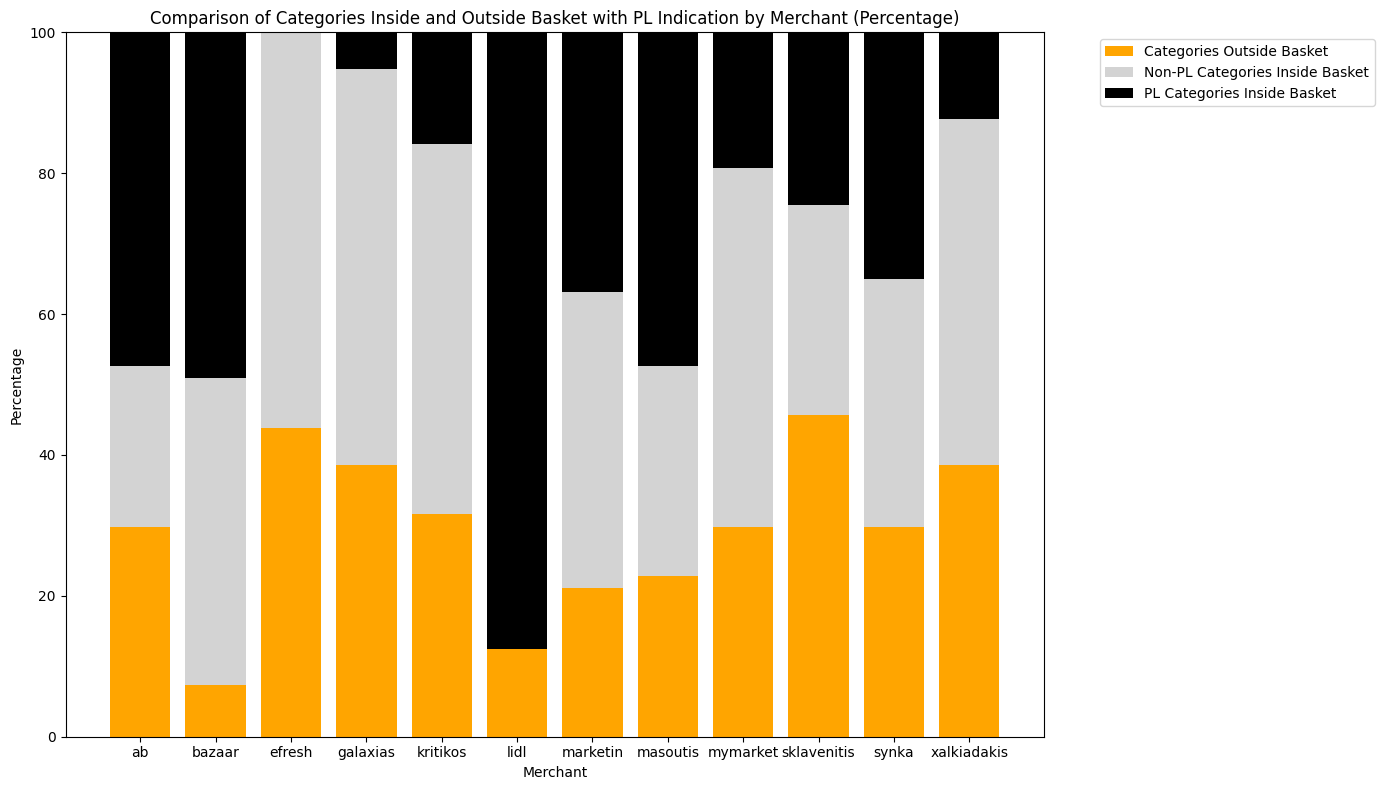

In [141]:
# Sample data for absolute counts
# Assuming df_cheapest is already defined and contains 'merchant_name', 'category_name', 'inbasket', and 'pl'

# Step 1: Calculate the absolute count of categories inside and outside the basket for each merchant
inside_basket = df_cheapest[df_cheapest['inbasket'] == 'YES']
outside_basket = df_cheapest[df_cheapest['inbasket'] == 'NO']

categories_inside_basket_count = inside_basket.groupby('merchant_name')['category_name'].nunique().reset_index()
categories_inside_basket_count.columns = ['Merchant', 'Categories_Inside_Basket_Count']

categories_outside_basket_count = outside_basket.groupby('merchant_name')['category_name'].nunique().reset_index()
categories_outside_basket_count.columns = ['Merchant', 'Categories_Outside_Basket_Count']

# Step 2: Calculate the absolute count of private labels within the inside basket categories
inside_basket['pl'] = pd.to_numeric(inside_basket['pl'], errors='coerce')
pl_inside_basket_count = inside_basket.groupby('merchant_name')['pl'].sum().reset_index()
pl_inside_basket_count.columns = ['Merchant', 'PL_Inside_Basket_Count']

# Merge the dataframes
merged_df = pd.merge(categories_inside_basket_count, categories_outside_basket_count, on='Merchant', how='outer').fillna(0)
merged_df = pd.merge(merged_df, pl_inside_basket_count, on='Merchant', how='outer').fillna(0)

# Calculate the non-private label part of inside basket
merged_df['Non_PL_Inside_Basket_Count'] = merged_df['Categories_Inside_Basket_Count'] - merged_df['PL_Inside_Basket_Count']

# Calculate total categories for each merchant
merged_df['Total_Categories'] = merged_df['Categories_Inside_Basket_Count'] + merged_df['Categories_Outside_Basket_Count']

# Convert counts to percentages
merged_df['Categories_Outside_Basket_Percentage'] = (merged_df['Categories_Outside_Basket_Count'] / merged_df['Total_Categories']) * 100
merged_df['Non_PL_Inside_Basket_Percentage'] = (merged_df['Non_PL_Inside_Basket_Count'] / merged_df['Total_Categories']) * 100
merged_df['PL_Inside_Basket_Percentage'] = (merged_df['PL_Inside_Basket_Count'] / merged_df['Total_Categories']) * 100

# Create a stacked bar chart with percentages
fig, ax = plt.subplots(figsize=(14, 8))

# Stacked bar chart for categories inside and outside the basket with percentages
bars1 = ax.bar(merged_df['Merchant'], merged_df['Categories_Outside_Basket_Percentage'], color='orange', label='Categories Outside Basket')
bars2 = ax.bar(merged_df['Merchant'], merged_df['Non_PL_Inside_Basket_Percentage'], bottom=merged_df['Categories_Outside_Basket_Percentage'], color='lightgray', label='Non-PL Categories Inside Basket')
bars3 = ax.bar(merged_df['Merchant'], merged_df['PL_Inside_Basket_Percentage'], bottom=merged_df['Categories_Outside_Basket_Percentage'] + merged_df['Non_PL_Inside_Basket_Percentage'], color='black', label='PL Categories Inside Basket')

# Set labels and title
ax.set_xlabel('Merchant')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Categories Inside and Outside Basket with PL Indication by Merchant (Percentage)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


In [142]:
merged_df

,Merchant,Categories_Inside_Basket_Count,Categories_Outside_Basket_Count,PL_Inside_Basket_Count,Non_PL_Inside_Basket_Count,Total_Categories,Categories_Outside_Basket_Percentage,Non_PL_Inside_Basket_Percentage,PL_Inside_Basket_Percentage
0,ab,40,17,27.0,13.0,57,29.824561,22.807018,47.368421
1,bazaar,51,4,27.0,24.0,55,7.272727,43.636364,49.090909
2,efresh,32,25,0.0,32.0,57,43.859649,56.140351,0.000000
3,galaxias,35,22,3.0,32.0,57,38.596491,56.140351,5.263158
4,kritikos,39,18,9.0,30.0,57,31.578947,52.631579,15.789474
5,lidl,49,7,49.0,0.0,56,12.500000,0.000000,87.500000
6,marketin,45,12,21.0,24.0,57,21.052632,42.105263,36.842105
7,masoutis,44,13,27.0,17.0,57,22.807018,29.824561,47.368421
8,mymarket,40,17,11.0,29.0,57,29.824561,50.877193,19.298246
9,sklavenitis,31,26,14.0,17.0,57,45.614035,29.824561,24.561404


**AB:**

High percentage of PL products inside the basket (47.37%).
Moderate number of categories outside the basket (29.82%).
Indicates a strong presence of PL products within the basket.

**Bazaar:**

Almost half of the products inside the basket are PL (49.09%).
Very low percentage of categories outside the basket (7.27%).
High overall inclusion rate of the cheapest categories in the basket.
Efresh:

No PL products inside the basket (0%).
High percentage of categories outside the basket (43.86%).
Relies heavily on non-PL products.

**Galaxias:**

Very low percentage of PL products inside the basket (5.26%).
High percentage of categories outside the basket (38.60%).
Predominantly non-PL products are included in the basket.

**Kritikos:**

Low percentage of PL products inside the basket (15.79%).
Moderate percentage of categories outside the basket (31.58%).
Majority of products inside the basket are non-PL.

**Lidl:**

Extremely high percentage of PL products inside the basket (87.50%).
Low percentage of categories outside the basket (12.50%).
Strong focus on PL products within the basket.

**MarketIn:**

Moderate percentage of PL products inside the basket (36.84%).
Low percentage of categories outside the basket (21.05%).
Balanced approach between PL and non-PL products inside the basket.

**Masoutis:**

High percentage of PL products inside the basket (47.37%).
Low percentage of categories outside the basket (22.81%).
Indicates a significant presence of PL products within the basket.

**MyMarket:**

Low percentage of PL products inside the basket (19.30%).
Moderate percentage of categories outside the basket (29.82%).
Predominantly non-PL products inside the basket.

**Sklavenitis:**

Moderate percentage of PL products inside the basket (24.56%).
High percentage of categories outside the basket (45.61%).
Indicates a strong reliance on non-PL products inside the basket.

**Synka:**

Equal distribution of PL and non-PL products inside the basket (35.09% each).
Moderate percentage of categories outside the basket (29.82%).
Balanced approach between PL and non-PL products.

**Xalkiadakis:**

Low percentage of PL products inside the basket (12.28%).
High percentage of categories outside the basket (38.60%).
Predominantly non-PL products inside the basket.

**Overall Insights:**

- Lidl stands out with a very high focus on PL products within the basket (87.50%), suggesting a strong strategy towards private label products.
- Efresh and Galaxias have a very low or non-existent percentage of PL products in the basket, indicating a preference for non-PL products.
- The rest of the merchants have a more balanced or moderate approach towards PL products inside the basket, with varying degrees of reliance on non-PL products.

#### How much does each merchant's basket costs (normalized price per unit)

In [20]:
df_cheapest.groupby('merchant_name')['price_normalized'].sum()

merchant_name
ab             185.200
bazaar         235.270
efresh         244.951
galaxias       183.340
kritikos       162.850
lidl           162.550
marketin       181.080
masoutis       233.960
mymarket       221.800
sklavenitis    190.010
synka          232.140
xalkiadakis    199.200
Name: price_normalized, dtype: float64